In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np

import random

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.feature_selection import SelectKBest, chi2
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/NITT datasets/OSMI 2016 Mental Health in Tech Survey.csv')

In [ ]:
pd.set_option('display.max_columns',None)
pd.options.display.max_rows = None

In [ ]:
data.shape

(1433, 63)

In [ ]:
data.isna().sum().sum()/(131*124)

1.351883772469835

In [ ]:
data.head(1)

,Are you self-employed?,How many employees does your company or organization have?,Is your employer primarily a tech company/organization?,Is your primary role within your company related to tech/IT?,Does your employer provide mental health benefits as part of healthcare coverage?,Do you know the options for mental health care available under your employer-provided coverage?,"Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?",Does your employer offer resources to learn more about mental health concerns and options for seeking help?,Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources provided by your employer?,"If a mental health issue prompted you to request a medical leave from work, asking for that leave would be:",Do you think that discussing a mental health disorder with your employer would have negative consequences?,Do you think that discussing a physical health issue with your employer would have negative consequences?,Would you feel comfortable discussing a mental health disorder with your coworkers?,Would you feel comfortable discussing a mental health disorder with your direct supervisor(s)?,Do you feel that your employer takes mental health as seriously as physical health?,Have you heard of or observed negative consequences for co-workers who have been open about mental health issues in your workplace?,Do you have medical coverage (private insurance or state-provided) which includes treatment of mental health issues?,Do you know local or online resources to seek help for a mental health disorder?,"If you have been diagnosed or treated for a mental health disorder, do you ever reveal this to clients or business contacts?","If you have revealed a mental health issue to a client or business contact, do you believe this has impacted you negatively?","If you have been diagnosed or treated for a mental health disorder, do you ever reveal this to coworkers or employees?","If you have revealed a mental health issue to a coworker or employee, do you believe this has impacted you negatively?",Do you believe your productivity is ever affected by a mental health issue?,"If yes, what percentage of your work time (time performing primary or secondary job functions) is affected by a mental health issue?",Do you have previous employers?,Have your previous employers provided mental health benefits?,Were you aware of the options for mental health care provided by your previous employers?,Did your previous employers ever formally discuss mental health (as part of a wellness campaign or other official communication)?,Did your previous employers provide resources to learn more about mental health issues and how to seek help?,Was your anonymity protected if you chose to take advantage of mental health or substance abuse treatment resources with previous employers?,Do you think that discussing a mental health disorder with previous employers would have negative consequences?,Do you think that discussing a physical health issue with previous employers would have negative consequences?,Would you have been willing to discuss a mental health issue with your previous co-workers?,Would you have been willing to discuss a mental health issue with your direct supervisor(s)?,Did you feel that your previous employers took mental health as seriously as physical health?,Did you hear of or observe negative consequences for co-workers with mental health issues in your previous workplaces?,Would you be willing to bring up a physical health issue with a potential employer in an interview?,Why or why not?,Would you bring up a mental health issue with a potential employer in an interview?,Why or why not?.1,Do you feel that being identified as a person with a mental health issue would hurt your career?,Do you think that team members/co-workers would view you more negatively if they knew you suffered from a menta

In [ ]:
list(data)

['Are you self-employed?',
 'How many employees does your company or organization have?',
 'Is your employer primarily a tech company/organization?',
 'Is your primary role within your company related to tech/IT?',
 'Does your employer provide mental health benefits as part of healthcare coverage?',
 'Do you know the options for mental health care available under your employer-provided coverage?',
 'Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?',
 'Does your employer offer resources to learn more about mental health concerns and options for seeking help?',
 'Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources provided by your employer?',
 'If a mental health issue prompted you to request a medical leave from work, asking for that leave would be:',
 'Do you think that discussing a mental health disorder with your employer would have neg

In [ ]:
data.drop(columns=[
 'Do you know the options for mental health care available under your employer-provided coverage?',
 'Does your employer offer resources to learn more about mental health concerns and options for seeking help?',
 'Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources provided by your employer?',
 'If a mental health issue prompted you to request a medical leave from work, asking for that leave would be:',
 'Do you think that discussing a mental health disorder with your employer would have negative consequences?',
 'Do you think that discussing a physical health issue with your employer would have negative consequences?',
 'Would you feel comfortable discussing a mental health disorder with your coworkers?',
 'Would you feel comfortable discussing a mental health disorder with your direct supervisor(s)?',
 'Do you feel that your employer takes mental health as seriously as physical health?',
 'Have you heard of or observed negative consequences for co-workers who have been open about mental health issues in your workplace?',
 'Do you know local or online resources to seek help for a mental health disorder?',
 'If you have been diagnosed or treated for a mental health disorder, do you ever reveal this to clients or business contacts?',
 'If you have revealed a mental health issue to a client or business contact, do you believe this has impacted you negatively?',
 'If you have been diagnosed or treated for a mental health disorder, do you ever reveal this to coworkers or employees?',
 'If you have revealed a mental health issue to a coworker or employee, do you believe this has impacted you negatively?',
 'Do you believe your productivity is ever affected by a mental health issue?',
 'If yes, what percentage of your work time (time performing primary or secondary job functions) is affected by a mental health issue?',
 'Do you have previous employers?',
 'Have your previous employers provided mental health benefits?',
 'Were you aware of the options for mental health care provided by your previous employers?',
 'Did your previous employers ever formally discuss mental health (as part of a wellness campaign or other official communication)?',
 'Did your previous employers provide resources to learn more about mental health issues and how to seek help?',
 'Was your anonymity protected if you chose to take advantage of mental health or substance abuse treatment resources with previous employers?',
 'Do you think that discussing a mental health disorder with previous employers would have negative consequences?',
 'Do you think that discussing a physical health issue with previous employers would have negative consequences?',
 'Would you have been willing to discuss a mental health issue with your previous co-workers?',
 'Would you have been willing to discuss a mental health issue with your direct supervisor(s)?',
 'Did you feel that your previous employers took mental health as seriously as physical health?',
 'Did you hear of or observe negative consequences for co-workers with mental health issues in your previous workplaces?',
 'Would you be willing to bring up a physical health issue with a potential employer in an interview?',
 'Why or why not?',
 'Would you bring up a mental health issue with a potential employer in an interview?',
 'Why or why not?.1',
 'Do you feel that being identified as a person with a mental health issue would hurt your career?',
 'Do you think that team members/co-workers would view you more negatively if they knew you suffered from a mental health issue?',
 'How willing would you be to share with friends and family that you have a mental illness?',
 'Have you observed or experienced an unsupportive or badly handled response to a mental health issue in your current or previous workplace?',
 'Have your observations of how another individual who discussed a mental health disorder made you less likely to reveal a mental health issue yourself in your current workplace?',
 'Have you had a mental health disorder in the past?',
 'If yes, what condition(s) have you been diagnosed with?',
 'If maybe, what condition(s) do you believe you have?',
 'If so, what condition(s) were you diagnosed with?',
 'If you have a mental health issue, do you feel that it interferes with your work when being treated effectively?',
 'If you have a mental health issue, do you feel that it interferes with your work when NOT being treated effectively?',
 'What US state or territory do you live in?',
 'What US state or territory do you work in?',
 'Which of the following best describes your work position?',
 'Do you work remotely?'
 ],inplace = True,axis =1
          )

In [ ]:
data.shape

(1433, 15)

In [ ]:
data.columns

Index(['Are you self-employed?',
       'How many employees does your company or organization have?',
       'Is your employer primarily a tech company/organization?',
       'Is your primary role within your company related to tech/IT?',
       'Does your employer provide mental health benefits as part of healthcare coverage?',
       'Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?',
       'Do you have medical coverage (private insurance or state-provided) which includes treatment of  mental health issues?',
       'Do you have a family history of mental illness?',
       'Do you currently have a mental health disorder?',
       'Have you been diagnosed with a mental health condition by a medical professional?',
       'Have you ever sought treatment for a mental health issue from a mental health professional?',
       'What is your age?', 'What is your gender?',
       'What country do you live i

In [ ]:
new_column_order = ['Are you self-employed?',
       'How many employees does your company or organization have?',
       'Is your employer primarily a tech company/organization?',
       'Is your primary role within your company related to tech/IT?',
       'Does your employer provide mental health benefits as part of healthcare coverage?',
       'Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?',
       'Do you have medical coverage (private insurance or state-provided) which includes treatment of  mental health issues?',
       'Do you currently have a mental health disorder?',
       'Have you been diagnosed with a mental health condition by a medical professional?',
       'Have you ever sought treatment for a mental health issue from a mental health professional?',
       'Do you have a family history of mental illness?',
       'What is your age?', 'What is your gender?',
       'What country do you live in?', 'What country do you work in?']
data = data.reindex(columns=new_column_order)

In [ ]:
data.columns

Index(['Are you self-employed?',
       'How many employees does your company or organization have?',
       'Is your employer primarily a tech company/organization?',
       'Is your primary role within your company related to tech/IT?',
       'Does your employer provide mental health benefits as part of healthcare coverage?',
       'Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?',
       'Do you have medical coverage (private insurance or state-provided) which includes treatment of  mental health issues?',
       'Do you currently have a mental health disorder?',
       'Have you been diagnosed with a mental health condition by a medical professional?',
       'Have you ever sought treatment for a mental health issue from a mental health professional?',
       'Do you have a family history of mental illness?', 'What is your age?',
       'What is your gender?', 'What country do you live in?',
  

In [ ]:
data.columns = ['Self-employed?', 'Num. Employees', 'Tech company?',
               'Tech related role?', 'M-H benefits?','Workplace Discussion?','Medical Coverage?',
                'Current illness', 'Previously diagnosed?','Sought help?',
                'Illness history?', 'Age', 'Gender', 'Live Country',
                   'Work Country']

In [ ]:
data.isna().sum().sort_values()

Self-employed?              0
Current illness             0
Previously diagnosed?       0
Sought help?                0
Illness history?            0
Age                         0
Live Country                0
Work Country                0
Gender                      3
Num. Employees            287
Tech company?             287
M-H benefits?             287
Workplace Discussion?     287
Tech related role?       1170
Medical Coverage?        1433
dtype: int64

In [ ]:
#stop

In [ ]:
data['Tech related role?'] = data['Tech related role?'].fillna(1.0)

In [ ]:
data['Tech related role?'].value_counts()

1.0    1418
0.0      15
Name: Tech related role?, dtype: int64

In [ ]:
data.drop(data[data['Tech related role?'] == 0.0].index, inplace=True)

In [ ]:
data['Tech related role?'].value_counts()

1.0    1418
Name: Tech related role?, dtype: int64

In [ ]:
data.shape

(1418, 15)

In [ ]:
data.drop(columns='Tech related role?',inplace=True)

In [ ]:
data['Gender'] = data['Gender'].fillna('Other')

In [ ]:
data['Gender'] = data['Gender'].str.lower().str.strip()
data['Gender'].value_counts()

male                                                                                                                                                            868
female                                                                                                                                                          254
m                                                                                                                                                               164
f                                                                                                                                                                60
woman                                                                                                                                                             6
man                                                                                                                                                               5
non-binary      

In [ ]:
data["Gender"].unique()

array(['male', 'female', 'm', 'i identify as female.', 'bigender',
       'non-binary', 'female assigned at birth', 'f', 'man', 'fm',
       'cis female', 'transitioned, m2f', 'genderfluid (born female)',
       'other/transfeminine', 'female or multi-gender femme', 'woman',
       'female/woman', 'cis male', 'male.', 'androgynous',
       'male 9:1 female, roughly', 'other', 'male (cis)', 'nb masculine',
       'cisgender female', 'sex is male', 'none of your business',
       'genderqueer', 'human', 'genderfluid', 'enby', 'malr',
       'genderqueer woman', 'mtf', 'queer', 'agender', 'dude', 'fluid',
       "i'm a man why didn't you make this a drop down question. you should of asked sex? and i would of answered yes please. seriously how much text can this take?",
       'mail', 'm|', 'male/genderqueer', 'fem', 'nonbinary',
       'female (props for making this a freeform field, though)',
       'unicorn', 'male (trans, ftm)', 'cis-woman', 'cisdude',
       'genderflux demi-girl', 'f

In [ ]:
Male = ['male', 'm', 'man', 'cis male', 'male.', 'male (cis)', 'nb masculine', 'sex is male', 'malr', 'mtf', 'dude', 'mail', 'm|', 'male/genderqueer', 'cis man', 'cisdude', 'male (trans, ftm)']
Female = [ 'fm','female', 'i identify as female.', 'female assigned at birth', 'f', 'genderfluid (born female)', 'female (props for making this a freeform field, though)','female or multi-gender femme', 'woman', 'female/woman',  'genderqueer woman','fem',  'cis-woman',  'afab']
Other = ['transgender woman', 'cis female','bigender','cisgender female', 'non-binary', 'other/transfeminine', 'androgynous', 'male 9:1 female, roughly', 'other','genderflux demi-girl', 'none of your business', 'genderqueer', 'human', 'genderfluid', 'enby',  'mtf','nonbinary',  'unicorn', 'cis-woman', 'female-bodied; no feelings about gender', 'queer', 'agender', 'fluid', "i'm a man why didn't you make this a drop down question. you should of asked sex? and i would of answered yes please. seriously how much text can this take?"]

In [ ]:
data['Gender'] = data['Gender'].replace(Male,'M')
data['Gender'] = data['Gender'].replace(Female,'F')
data['Gender'] = data['Gender'].replace(Other,'O')

In [ ]:
data['Gender'].value_counts()

M                    1054
F                     331
O                      32
transitioned, m2f       1
Name: Gender, dtype: int64

In [ ]:
Other = ['transitioned, m2f']
data['Gender'] = data['Gender'].replace(Other,'O')

In [ ]:
data['Gender'].value_counts()

M    1054
F     331
O      33
Name: Gender, dtype: int64

In [ ]:
data['M-H benefits?'].value_counts()

Yes                                524
I don't know                       316
No                                 210
Not eligible for coverage / N/A     81
Name: M-H benefits?, dtype: int64

In [ ]:
data.loc[data['M-H benefits?']=='Not eligible for coverage / N/A' , 'M-H benefits?'] = 'No'

In [ ]:
data['Previously diagnosed?'].value_counts()

Yes    710
No     708
Name: Previously diagnosed?, dtype: int64

In [ ]:
data['Previously diagnosed?'].fillna('Unspecified',inplace = True)

In [ ]:
a = 100 * (data.isna().sum()) / len(data)
print( 'Percentage of missing values for each column is\n')
a

Percentage of missing values for each column is



Self-employed?             0.000000
Num. Employees            20.239774
Tech company?             20.239774
M-H benefits?             20.239774
Workplace Discussion?     20.239774
Medical Coverage?        100.000000
Current illness            0.000000
Previously diagnosed?      0.000000
Sought help?               0.000000
Illness history?           0.000000
Age                        0.000000
Gender                     0.000000
Live Country               0.000000
Work Country               0.000000
dtype: float64

In [ ]:
data.loc[data['M-H benefits?']=='Yes', 'Medical Coverage?'] = 'Yes'

In [ ]:
data.loc[data['Live Country']=='United Kingdom', 'Medical Coverage?'] = 'Yes'

In [ ]:
US_total = data.loc[data['Live Country']=='United States of America']
print('Amount of USA residents :{}'.format(len(US_total)))

Amount of USA residents :826


In [ ]:
US_nan = data.loc[(data['Medical Coverage?'].isna()) & (data['Live Country']=='United States of America')]
print('Amount of USA residents without Medical coverage provided by their employer :{}'.format(len(US_nan)))

#Percentage of uninsured
Uninsured = round(100*((len(US_nan)) / (len(US_total))), 2)

print('This is ' + str(Uninsured) + '%')

Amount of USA residents without Medical coverage provided by their employer :405
This is 49.03%


In [ ]:
import random

In [ ]:
Nan_list = list(US_nan.index)
Random_samples = random.sample(Nan_list,4)
(Random_samples.sort())
print(Random_samples)
type(Random_samples)

[20, 385, 645, 753]


list

In [ ]:
for i in Random_samples:
  data.at[i, 'Medical Coverage?'] = 'No'

In [ ]:
data.loc[(data['Live Country']=='United States of America') & (data['Medical Coverage?'].isna()) , 'Medical Coverage?'] = 'Yes'

In [ ]:
data['Medical Coverage?'].isna().sum()

338

In [ ]:
data['Live Country'].value_counts()

United States of America    826
United Kingdom              180
Canada                       78
Germany                      57
Netherlands                  48
Australia                    35
Sweden                       19
France                       16
Ireland                      15
Switzerland                  10
Brazil                       10
New Zealand                   9
India                         9
Russia                        9
Bulgaria                      7
Finland                       7
Denmark                       7
Italy                         5
Belgium                       5
South Africa                  4
Romania                       4
Spain                         4
Poland                        4
Austria                       4
Norway                        3
Pakistan                      3
Chile                         3
Czech Republic                3
Japan                         2
Israel                        2
Other                         2
Bosnia a

In [ ]:
data.loc[(data['Live Country']=='Germany') | (data['Live Country']=='France') | (data['Live Country']=='Canada') |
         (data['Live Country']=='Spain') | (data['Live Country']=='Netherlands')
         , 'Medical Coverage?'] = 'Yes'

In [ ]:
data['Medical Coverage?'].isna().sum()

188

In [ ]:
data['Self-employed?'] = data['Self-employed?'].replace({1 : 'Yes' , 0 : 'No'})

In [ ]:
data['Tech company?'] = data['Tech company?'].replace({1.0 : 'Yes' , 0.0 : 'No'})

In [ ]:
data['Sought help?'] = data['Sought help?'].replace({1 : 'Yes' , 0 : 'No'})

In [ ]:
data['Age'].describe()

count    1418.000000
mean       34.254584
std        11.251193
min         3.000000
25%        28.000000
50%        33.000000
75%        39.000000
max       323.000000
Name: Age, dtype: float64

In [ ]:
data.loc[data['Age'] == 323]

,Self-employed?,Num. Employees,Tech company?,M-H benefits?,Workplace Discussion?,Medical Coverage?,Current illness,Previously diagnosed?,Sought help?,Illness history?,Age,Gender,Live Country,Work Country
564,No,100-500,Yes,Yes,I don't know,Yes,No,No,No,Yes,323,M,United States of America,United States of America


In [ ]:
data = data.drop(data[data['Age']==323].index)

In [ ]:
data['Age'].describe()

count    1417.000000
mean       34.050812
std         8.231482
min         3.000000
25%        28.000000
50%        33.000000
75%        39.000000
max        99.000000
Name: Age, dtype: float64

In [ ]:
data = data.drop(data[data['Age']==99].index)

In [ ]:
data['Age'].describe()

count    1416.000000
mean       34.004944
std         8.051204
min         3.000000
25%        28.000000
50%        33.000000
75%        38.250000
max        70.000000
Name: Age, dtype: float64

In [ ]:
age_min = data['Age'].min()
age_max = data['Age'].max()

bins = np.linspace(age_min, age_max, 10)
labels = ['G1','G2','G3','G4','G5','G6','G7','G8','G9']
bins

array([ 3.        , 10.44444444, 17.88888889, 25.33333333, 32.77777778,
       40.22222222, 47.66666667, 55.11111111, 62.55555556, 70.        ])

In [ ]:
data['Age'] = pd.cut(x=data['Age'], bins=bins, labels=labels, include_lowest=True)

In [ ]:
column_names = list(data.columns)

In [ ]:
for col in column_names:
    data[col] = data[col].astype('category')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1416 entries, 0 to 1432
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   Self-employed?         1416 non-null   category
 1   Num. Employees         1129 non-null   category
 2   Tech company?          1129 non-null   category
 3   M-H benefits?          1129 non-null   category
 4   Workplace Discussion?  1129 non-null   category
 5   Medical Coverage?      1228 non-null   category
 6   Current illness        1416 non-null   category
 7   Previously diagnosed?  1416 non-null   category
 8   Sought help?           1416 non-null   category
 9   Illness history?       1416 non-null   category
 10  Age                    1416 non-null   category
 11  Gender                 1416 non-null   category
 12  Live Country           1416 non-null   category
 13  Work Country           1416 non-null   category
dtypes: category(14)
memory usage: 37.2 KB


In [ ]:
column_mean = 'More than 1000'

# Replace NaN values with the mean
data['Num. Employees'] = data['Num. Employees'].fillna(column_mean)

#print(df)

In [ ]:
data['Num. Employees'].value_counts()


More than 1000    538
26-100            291
100-500           244
6-25              205
500-1000           79
1-5                59
Name: Num. Employees, dtype: int64

In [ ]:
a = 100 * (data.isna().sum()) / len(data)
print( 'Percentage of missing values for each column is\n')
a

Percentage of missing values for each column is



Self-employed?            0.000000
Num. Employees            0.000000
Tech company?             0.000000
M-H benefits?             0.000000
Workplace Discussion?     0.000000
Medical Coverage?        13.276836
Current illness           0.000000
Previously diagnosed?     0.000000
Sought help?              0.000000
Illness history?          0.000000
Age                       0.000000
Gender                    0.000000
Live Country              0.000000
Work Country              0.000000
dtype: float64

In [ ]:
data['Tech company?'].value_counts()

Yes    881
No     248
Name: Tech company?, dtype: int64

In [ ]:
column_mean = 'Yes'

# Replace NaN values with the mean
data['Tech company?'] = data['Tech company?'].fillna(column_mean)

In [ ]:
data['M-H benefits?'].value_counts()

Yes             522
I don't know    316
No              291
Name: M-H benefits?, dtype: int64

In [ ]:
column_mean = 'Yes'

# Replace NaN values with the mean
data['M-H benefits?'] = data['M-H benefits?'].fillna(column_mean)

In [ ]:
data['Workplace Discussion?'].value_counts()

No              805
Yes             223
I don't know    101
Name: Workplace Discussion?, dtype: int64

In [ ]:
column_mean = 'No'

# Replace NaN values with the mean
data['Workplace Discussion?'] = data['Workplace Discussion?'].fillna(column_mean)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1416 entries, 0 to 1432
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   Self-employed?         1416 non-null   category
 1   Num. Employees         1416 non-null   category
 2   Tech company?          1416 non-null   category
 3   M-H benefits?          1416 non-null   category
 4   Workplace Discussion?  1416 non-null   category
 5   Medical Coverage?      1228 non-null   category
 6   Current illness        1416 non-null   category
 7   Previously diagnosed?  1416 non-null   category
 8   Sought help?           1416 non-null   category
 9   Illness history?       1416 non-null   category
 10  Age                    1416 non-null   category
 11  Gender                 1416 non-null   category
 12  Live Country           1416 non-null   category
 13  Work Country           1416 non-null   category
dtypes: category(14)
memory usage: 37.2 KB


In [ ]:
data.nunique()

Self-employed?            2
Num. Employees            6
Tech company?             2
M-H benefits?             3
Workplace Discussion?     3
Medical Coverage?         2
Current illness           3
Previously diagnosed?     2
Sought help?              2
Illness history?          3
Age                       9
Gender                    3
Live Country             53
Work Country             53
dtype: int64

In [ ]:
data['Self-employed?'].unique()

['No', 'Yes']
Categories (2, object): ['No', 'Yes']

In [ ]:
data['Self-employed?'].value_counts()

No     1129
Yes     287
Name: Self-employed?, dtype: int64

In [ ]:
data.drop(columns='Self-employed?', inplace=True)

<Axes: title={'center': 'Distribution of different age groups'}, xlabel='Age groups', ylabel='Number of individuals'>

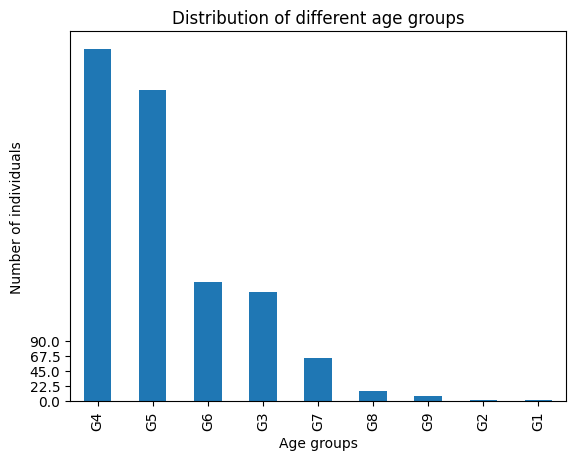

In [ ]:
data['Age'].value_counts().plot(kind='bar',xlabel='Age groups',ylabel='Number of individuals',
                                title='Distribution of different age groups', yticks=np.linspace(0,90,5))

In [ ]:
data2 = pd.get_dummies(data, drop_first=True)

In [ ]:
print(data2.shape)
data2.columns

(1416, 131)


Index(['Num. Employees_100-500', 'Num. Employees_26-100',
       'Num. Employees_500-1000', 'Num. Employees_6-25',
       'Num. Employees_More than 1000', 'Tech company?_Yes',
       'M-H benefits?_No', 'M-H benefits?_Yes', 'Workplace Discussion?_No',
       'Workplace Discussion?_Yes',
       ...
       'Work Country_South Africa', 'Work Country_Spain',
       'Work Country_Sweden', 'Work Country_Switzerland',
       'Work Country_Turkey', 'Work Country_United Arab Emirates',
       'Work Country_United Kingdom', 'Work Country_United States of America',
       'Work Country_Venezuela', 'Work Country_Vietnam'],
      dtype='object', length=131)

In [ ]:
X = data2.drop('Current illness_Yes', axis=1)
y = data2['Current illness_Yes']

In [ ]:
#Categorical feature selection
sf = SelectKBest(chi2, k='all')
sf_fit = sf.fit(X, y)

#Print feature scores
for i in range(len(sf_fit.scores_)):
    print(' %s: %f' % (X.columns[i], sf_fit.scores_[i]))

 Num. Employees_100-500: 0.021565
 Num. Employees_26-100: 1.229589
 Num. Employees_500-1000: 3.115480
 Num. Employees_6-25: 3.555132
 Num. Employees_More than 1000: 2.028644
 Tech company?_Yes: 0.021924
 M-H benefits?_No: 2.696220
 M-H benefits?_Yes: 15.275719
 Workplace Discussion?_No: 0.378626
 Workplace Discussion?_Yes: 0.039355
 Medical Coverage?_Yes: 1.801758
 Current illness_No: 350.981132
 Previously diagnosed?_Yes: 285.721322
 Sought help?_Yes: 159.018421
 Illness history?_No: 86.260489
 Illness history?_Yes: 87.470767
 Age_G2: 1.339623
 Age_G3: 0.333894
 Age_G4: 0.000293
 Age_G5: 0.014658
 Age_G6: 0.846665
 Age_G7: 0.181903
 Age_G8: 1.091337
 Age_G9: 2.857598
 Gender_M: 11.268628
 Gender_O: 8.670048
 Live Country_Algeria: 1.492958
 Live Country_Argentina: 0.669811
 Live Country_Australia: 0.457116
 Live Country_Austria: 0.380315
 Live Country_Bangladesh: 1.492958
 Live Country_Belgium: 0.000027
 Live Country_Bosnia and Herzegovina: 1.339623
 Live Country_Brazil: 0.000053
 Live

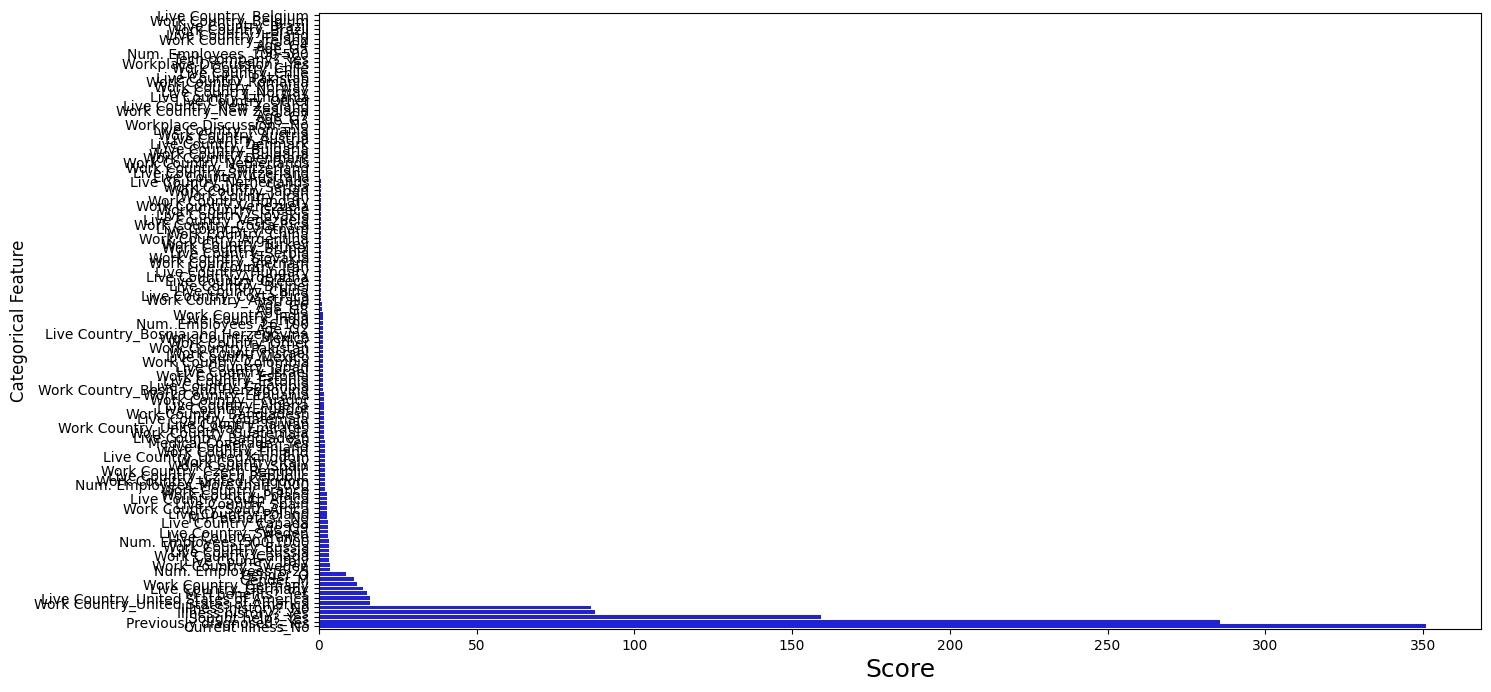

In [ ]:
datset = pd.DataFrame()
datset['feature'] = X.columns[range(len(sf_fit.scores_))]
datset['scores'] = sf_fit.scores_
datset = datset.sort_values(by='scores', ascending=True)

#Create barplot
plt.figure(figsize=(15,8))
sns.barplot(x=datset['scores'], y=datset['feature'], color='blue')
#Set style attributes
sns.set_style('whitegrid')
plt.ylabel('Categorical Feature', fontsize=12)
plt.xlabel('Score', fontsize=18)
plt.show()

In [ ]:
X1 = data.drop('Current illness', axis=1)
y1 = data['Current illness']

In [ ]:
oe = OrdinalEncoder()
oe.fit(X1)
X_enc = oe.transform(X1)

#Prepare target variable
#Label encoder is used to encode the output, or target variable,
#  in this case if the entry individual has a current mental illness or not
le = LabelEncoder()
le.fit(y1)
y_enc = le.transform(y1)

In [ ]:
print(X_enc.shape)
X_enc

(1416, 12)


array([[ 2.,  1.,  1., ...,  1., 49., 49.],
       [ 4.,  1.,  1., ...,  1., 50., 50.],
       [ 4.,  1.,  1., ...,  1., 49., 49.],
       ...,
       [ 1.,  1.,  2., ...,  1., 50., 50.],
       [ 1.,  0.,  0., ...,  0., 50., 50.],
       [ 1.,  1.,  2., ...,  2., 11., 10.]])

In [ ]:
print(y_enc.shape)
y_enc

(1416,)


array([1, 2, 1, ..., 0, 2, 2])

In [ ]:
np.any(np.isnan(X_enc))

True

In [ ]:
X_enc[np.isnan(X_enc)] = 0

In [ ]:
sf = SelectKBest(chi2, k='all')
sf_fit1 = sf.fit(X_enc, y_enc)

#Print feature scores
for i in range(len(sf_fit1.scores_)):
    print(' %s: %f' % (X1.columns[i], sf_fit1.scores_[i]))

 Num. Employees: 0.776808
 Tech company?: 0.039288
 M-H benefits?: 20.464452
 Workplace Discussion?: 0.669686
 Medical Coverage?: 1.818980
 Previously diagnosed?: 305.972649
 Sought help?: 188.799681
 Illness history?: 42.472859
 Age: 0.036073
 Gender: 5.661381
 Live Country: 93.804847
 Work Country: 105.489083


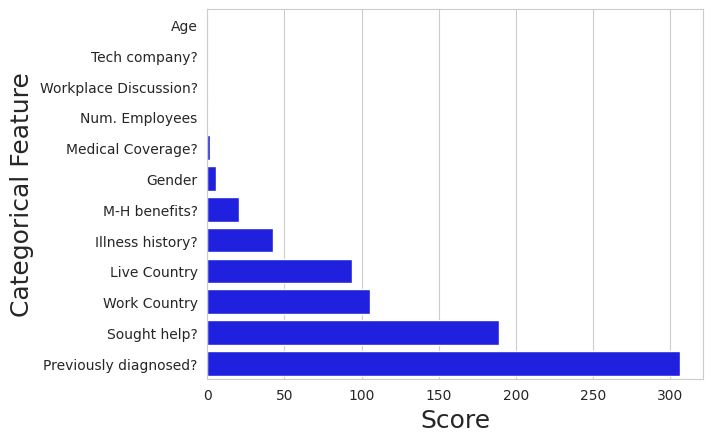

In [ ]:
datset1 = pd.DataFrame()
datset1['feature'] = X1.columns[range(len(sf_fit1.scores_))]
datset1['scores'] = sf_fit1.scores_
datset1 = datset1.sort_values(by='scores', ascending=True)

#Create barplot
sns.barplot(x=datset1['scores'], y=datset1['feature'], color='blue')
#Set style
sns.set_style('whitegrid')
plt.ylabel('Categorical Feature', fontsize=18)
plt.xlabel('Score', fontsize=18)
plt.show()

In [ ]:
data.drop(columns=['Workplace Discussion?','Tech company?'],
          inplace=True)

In [ ]:
data.to_csv('Data_2016.csv')

In [ ]:
df = pd.read_csv('/content/Data_2016.csv')

In [ ]:
df.shape

(1416, 12)

In [ ]:
df.drop(columns=['Unnamed: 0'],inplace = True)

In [ ]:
df

In [ ]:
df.to_csv('Data_2016.csv')